# ML Exercise 1 - Breast Cancer

### Experiment design

1. Exploration:
    - Target Distribution
    - Missing Values distribution
    - Outliers
2. Preprocessing:
    - Split Train/Test (70-30)
    - Clean missing values
    - Remove outliers
    - Scaling
    - Encoding
    - PCA
3. Models:
    - KNN
    - RF
    - MLP
4. Hyperparameter optimization (Randomized Search CV)
    - Performance comparison
    - Holdout
    - Cross-validation
5. Metrics:
    - Accuracy
    - Precision
    - Sensitivity (for each class)
    - Specificity (for each class)
    - Recall
    - F1-Score

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1. Exploratory Data Analysis

As this is the data from the competition, it is already divided into a train and test split. For the exploratory data analysis, we will combine the two splits into one, just to understand the data better. The reason we will combine them, is in the test set every single observation is a cancerous observation, meaning everyone in the test set has cancer. I am surprised the data set is divided in such a way, but we will at least understand the independent variables better when combining the two splits. Of course, later on we will use the already provided train and test split when developing models. Also, in the training split we have a distribution of the target variable of: False - 176 (62%), True - 109 (38%). 

In [2]:
df_train = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv")

In [3]:
df_test = pd.read_csv("data/breast-cancer-diagnostic.shuf.tes.csv")

In [4]:
df_test_target = pd.read_csv("data/breast-cancer-diagnostic.shuf.sol.ex.csv")

In [5]:
df_train.set_index("ID", inplace=True)
df_test.set_index("ID", inplace=True)
df_test_target.set_index("ID", inplace=True)

In [6]:
df_test = df_test.join(df_test_target)

In [7]:
df = df_train.append(df_test)

In [8]:
df_train['class'].value_counts()

False    176
True     109
Name: class, dtype: int64

In [9]:
df_test['class'].value_counts()

True    284
Name: class, dtype: int64

In [10]:
df['class'].value_counts()

True     393
False    176
Name: class, dtype: int64

In [11]:
df_train.shape

(285, 31)

In [12]:
df_test.shape

(284, 31)

In [13]:
df.shape

(569, 31)

### 1.1. Target distribution  
In the entire data set we have a target distribution of:  
True - 393 (69%)  
False - 176 (31%)  

In the test split we have a target distribution of:  
True - 284 (100%)  
False - 0 (0%)

In the train split we have a target distribution of:  
True - 109 (38%)  
False - 176 (62%)

### 1.2. Missing values  
We have no missing values in this data set.

In [14]:
# We have no missing values
df.isna().sum()

class                      0
radiusMean                 0
 textureMean               0
 perimeterMean             0
 areaMean                  0
 smoothnessMean            0
 compactnessMean           0
 concavityMean             0
 concavePointsMean         0
 symmetryMean              0
 fractalDimensionMean      0
 radiusStdErr              0
 textureStdErr             0
 perimeterStdErr           0
 areaStdErr                0
 smoothnessStdErr          0
 compactnessStdErr         0
 concavityStdErr           0
 concavePointsStdErr       0
 symmetryStdErr            0
 fractalDimensionStdErr    0
 radiusWorst               0
 textureWorst              0
 perimeterWorst            0
 areaWorst                 0
 smoothnessWorst           0
 compactnessWorst          0
 concavityWorst            0
 concavePointsWorst        0
 symmetryWorst             0
 fractalDimensionWorst     0
dtype: int64

In [15]:
df.describe()

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

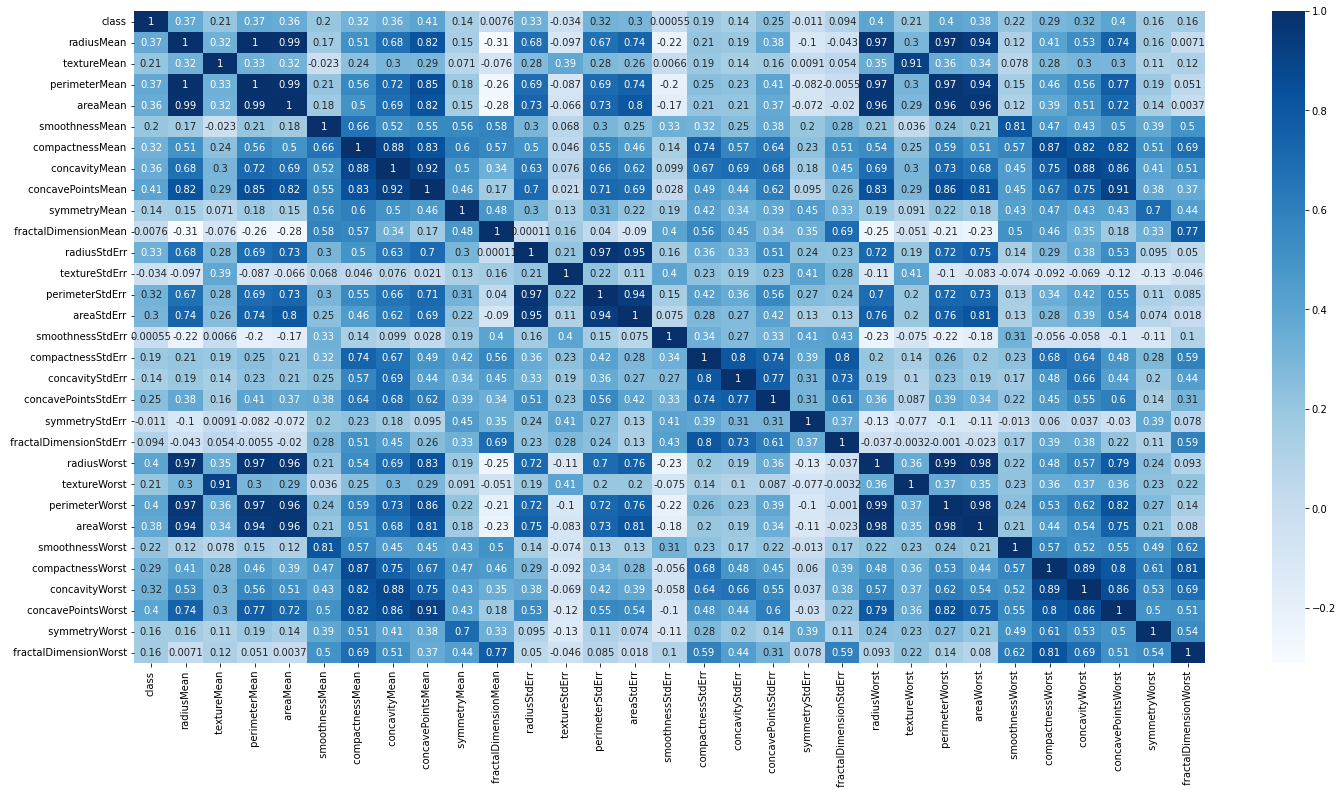

In [16]:
# a lot of variables are correlated between each other, as well as with the target variable which 
# makes sense considering all of the attributes are hearth measures
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [17]:
df.describe()

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
# fix the column names
df.columns = ['class', 'radiusMean', 'textureMean', 'perimeterMean',
       'areaMean', 'smoothnessMean', 'compactnessMean', 'concavityMean',
       'concavePointsMean', 'symmetryMean', 'fractalDimensionMean',
       'radiusStdErr', 'textureStdErr', 'perimeterStdErr', 'areaStdErr',
       'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr',
       'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr',
       'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst',
       'smoothnessWorst', 'compactnessWorst', 'concavityWorst',
       'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst']

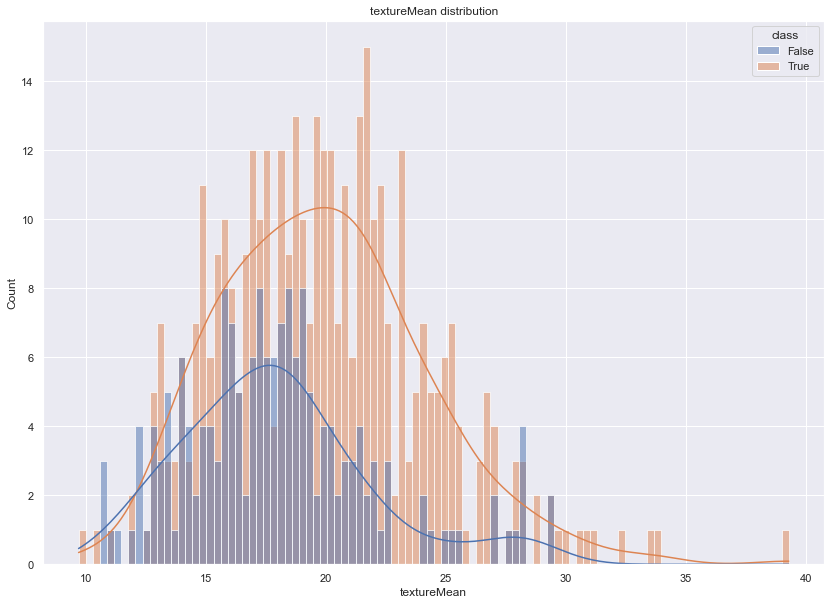

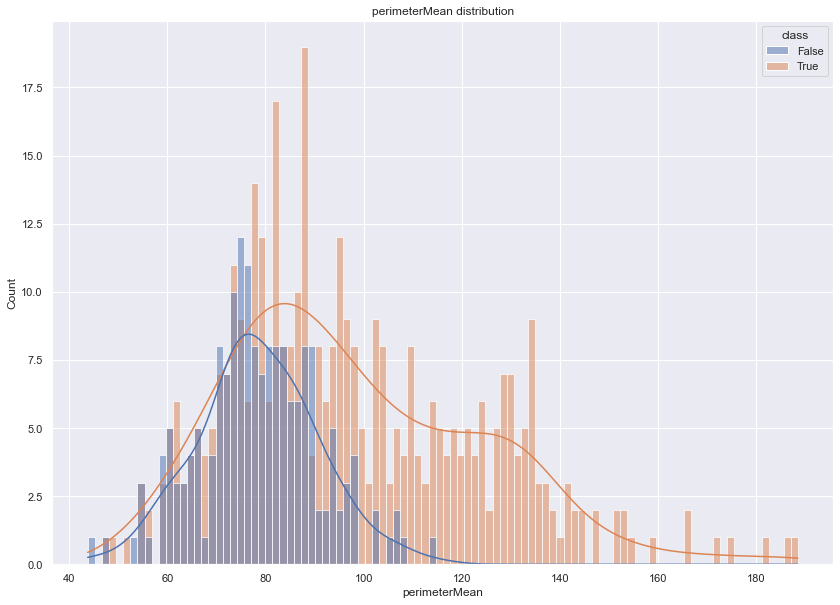

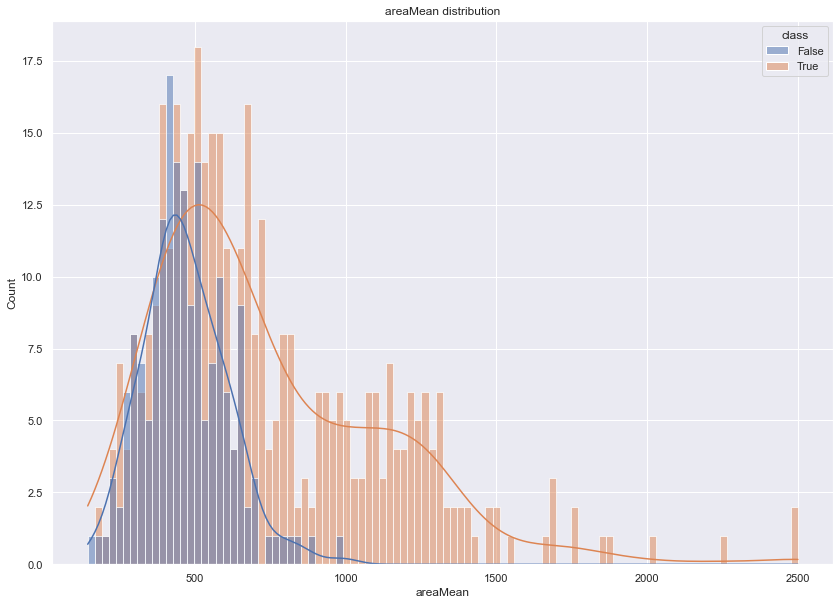

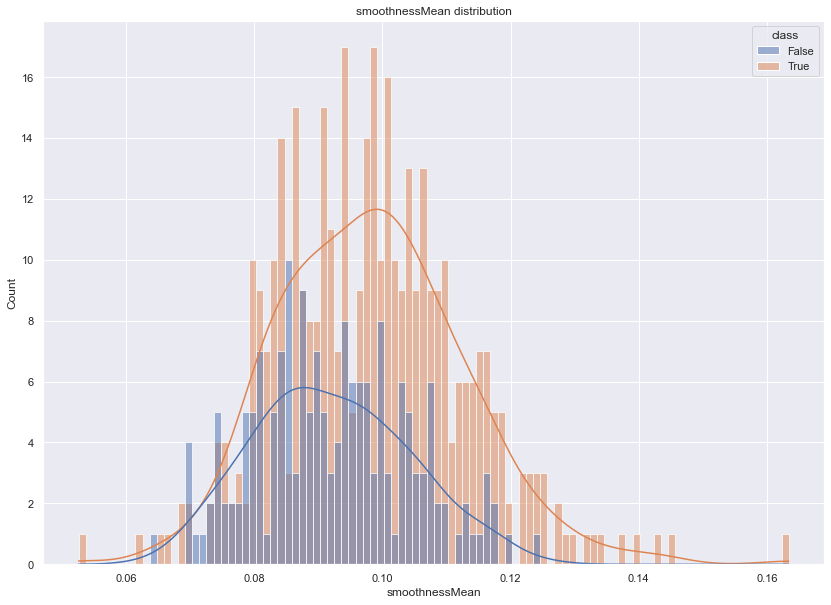

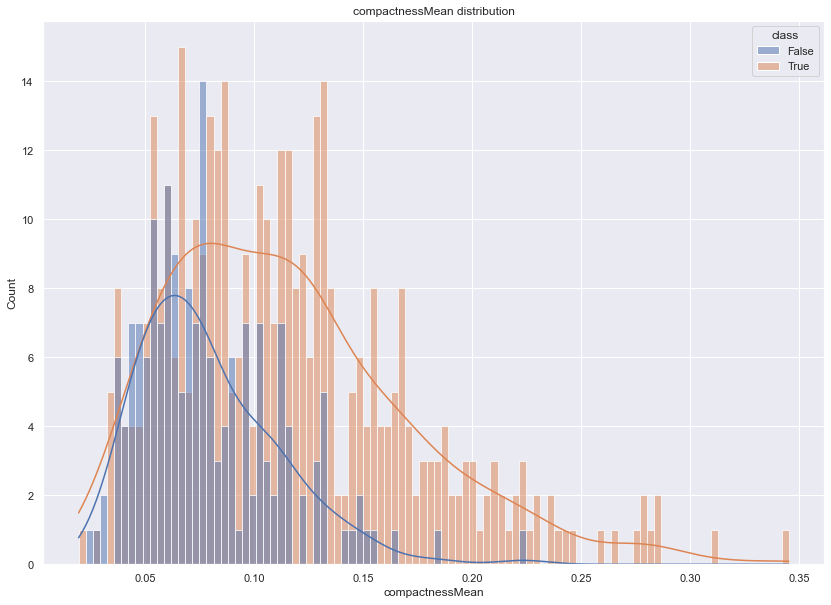

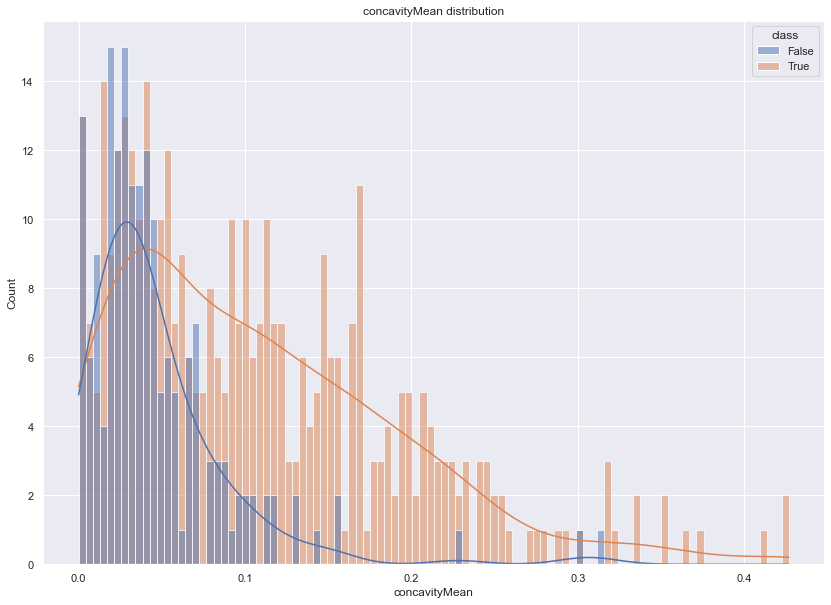

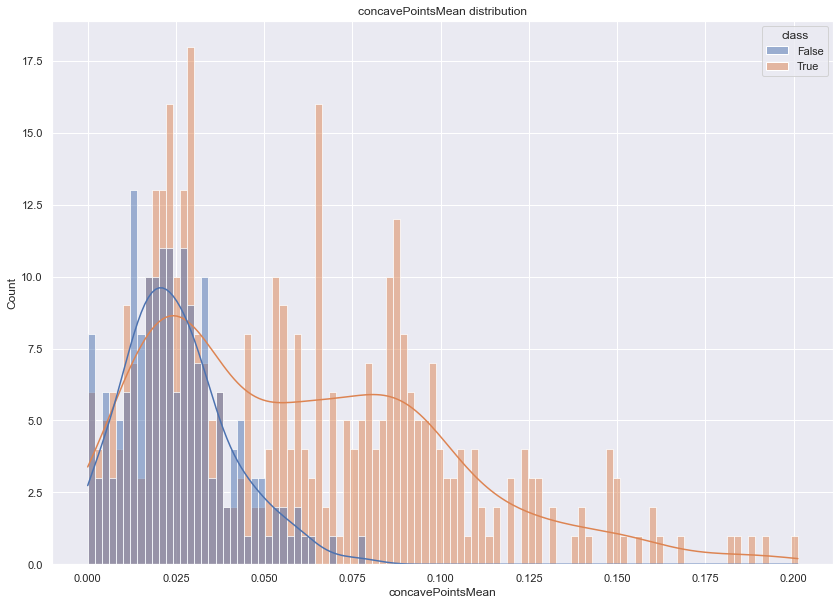

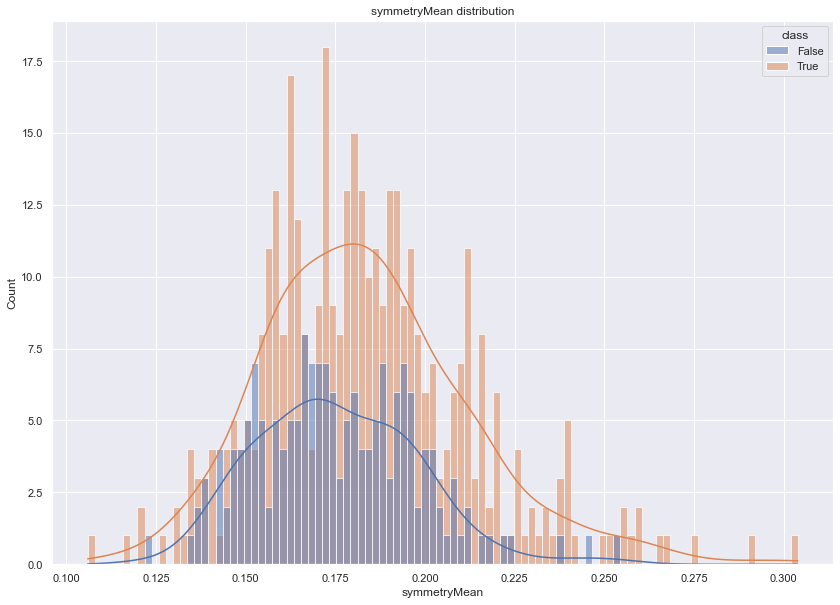

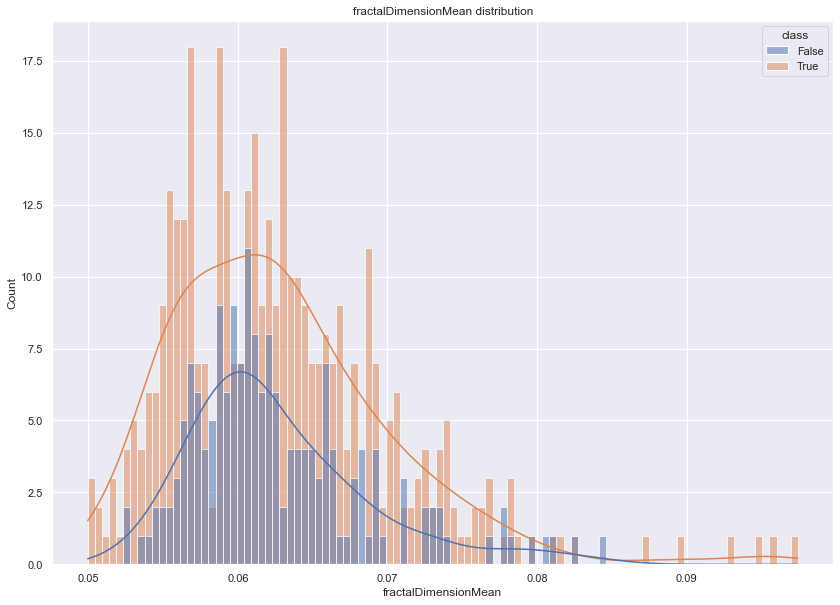

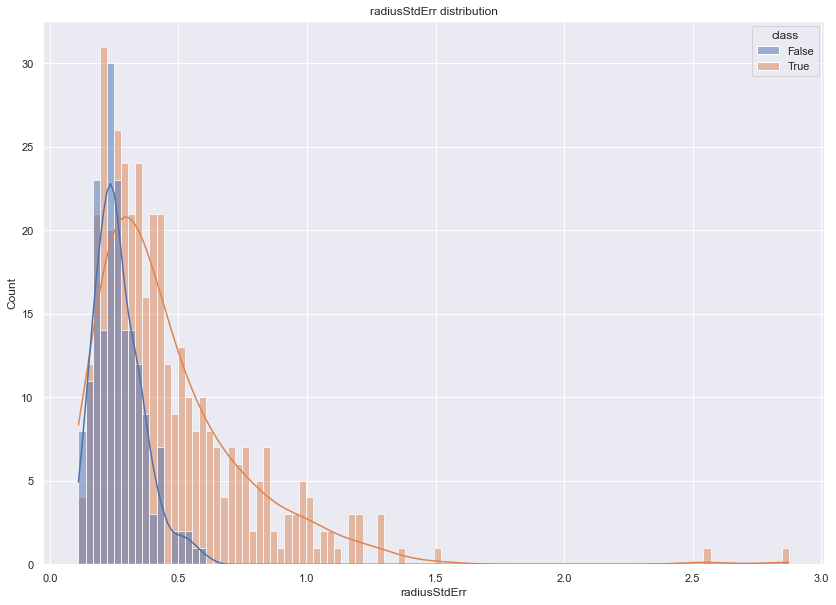

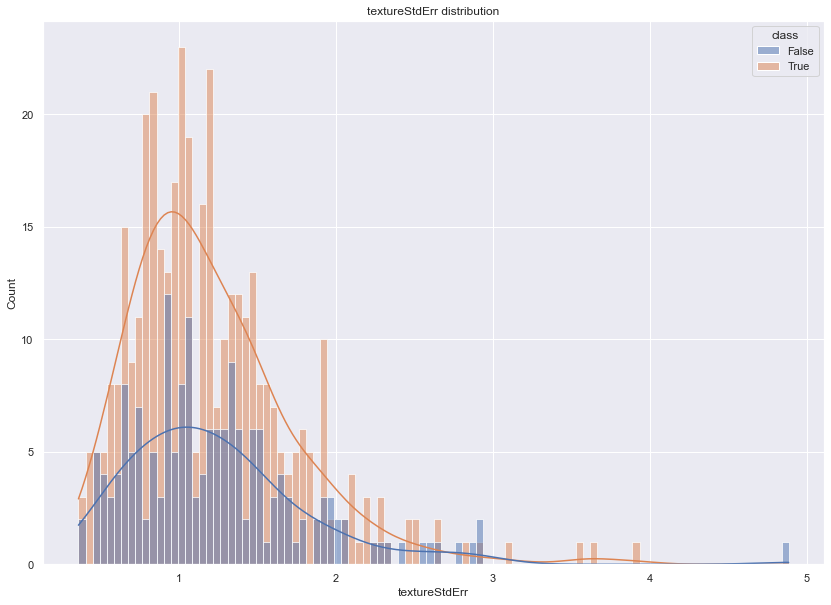

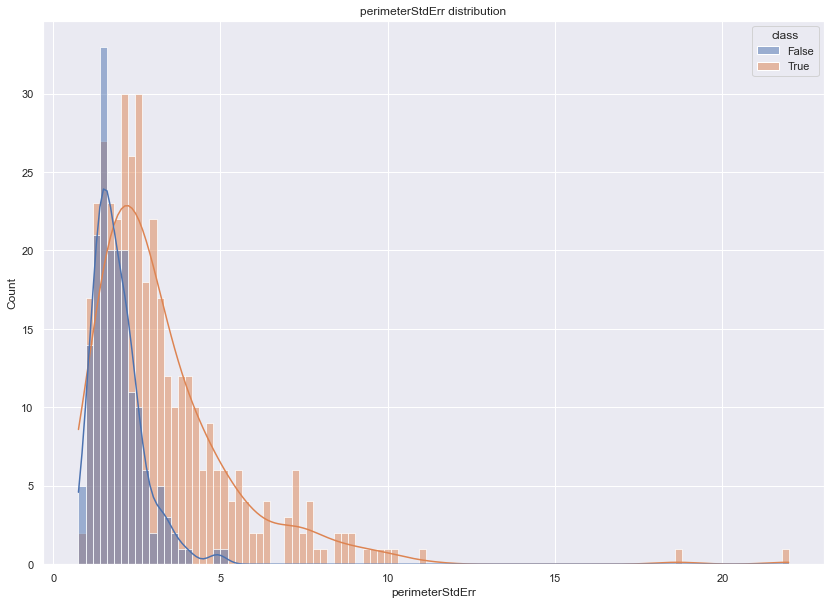

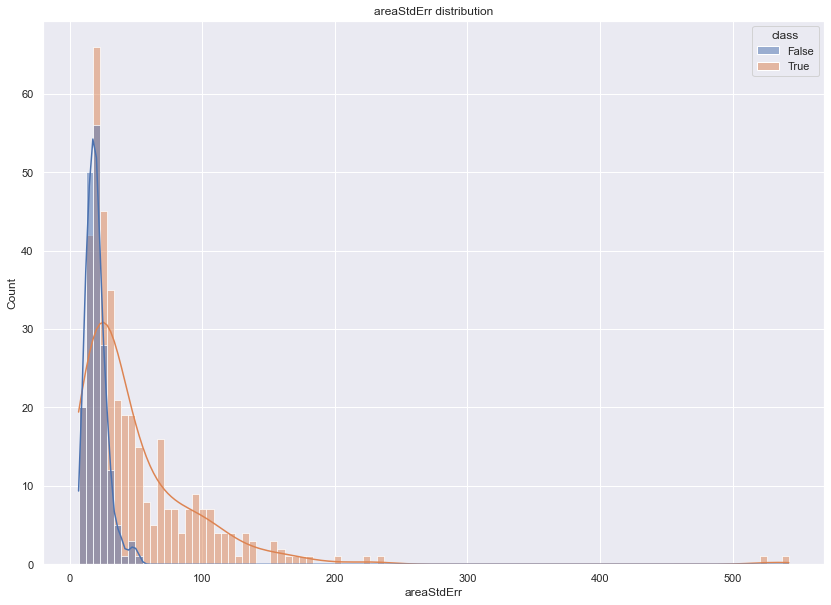

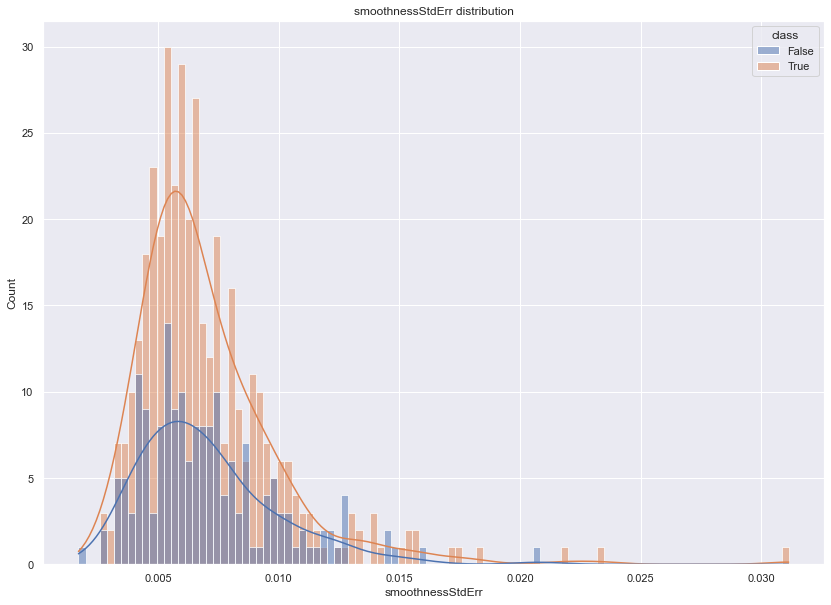

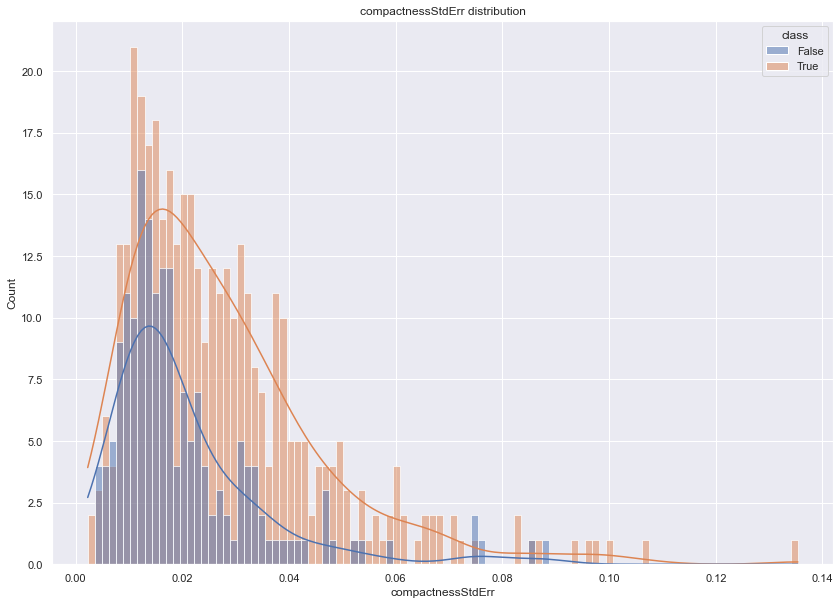

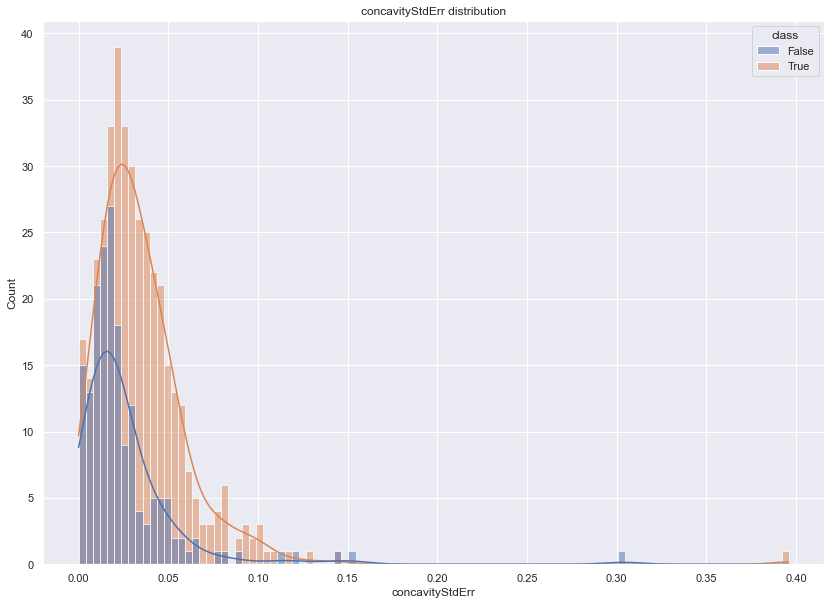

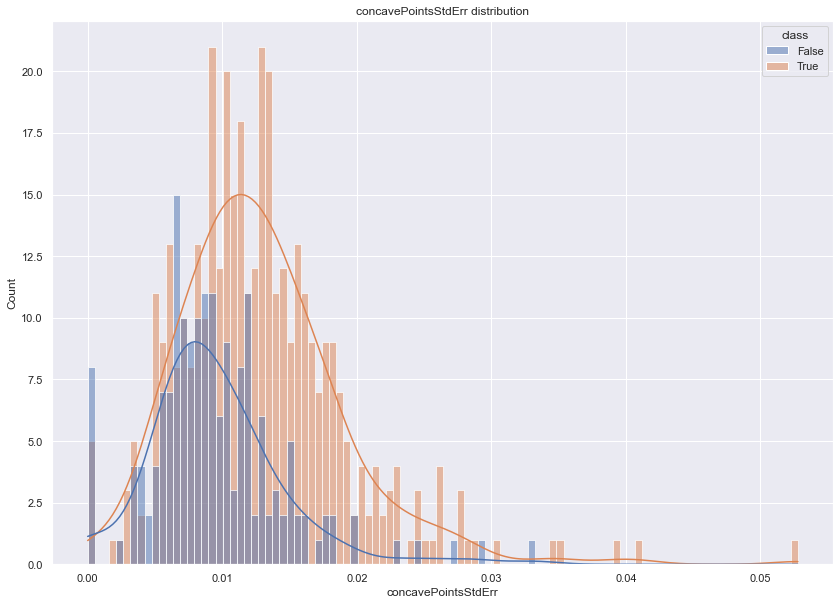

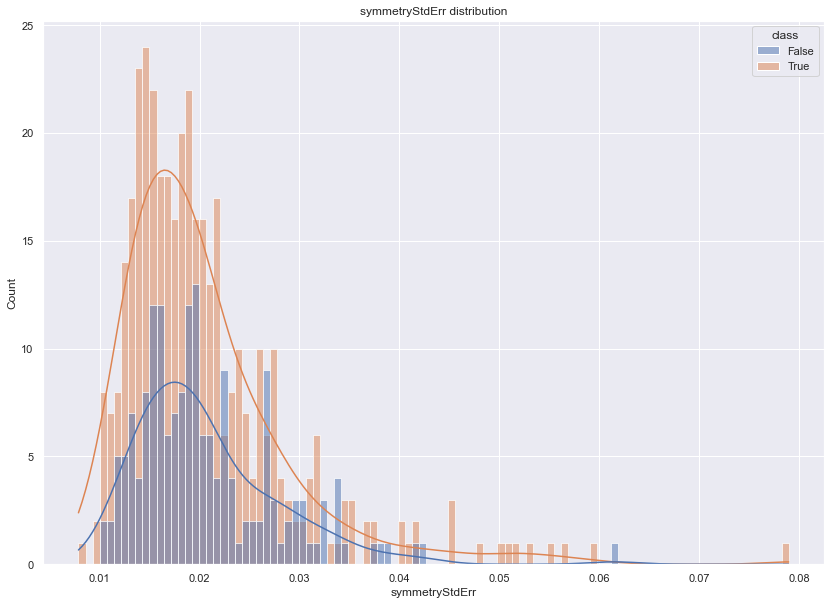

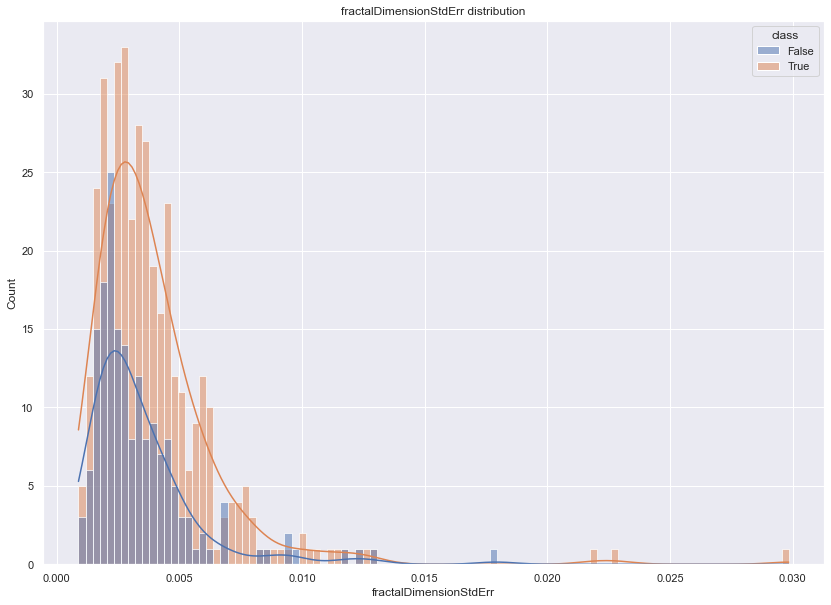

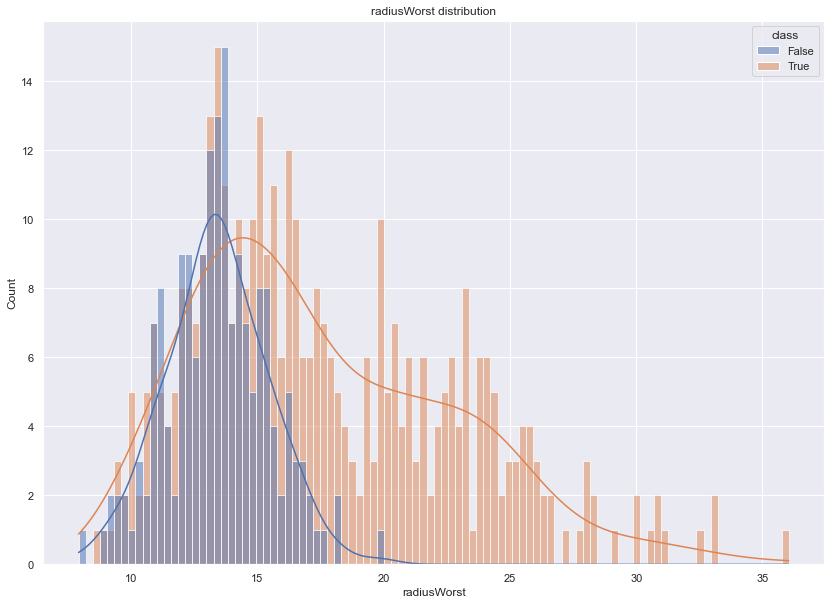

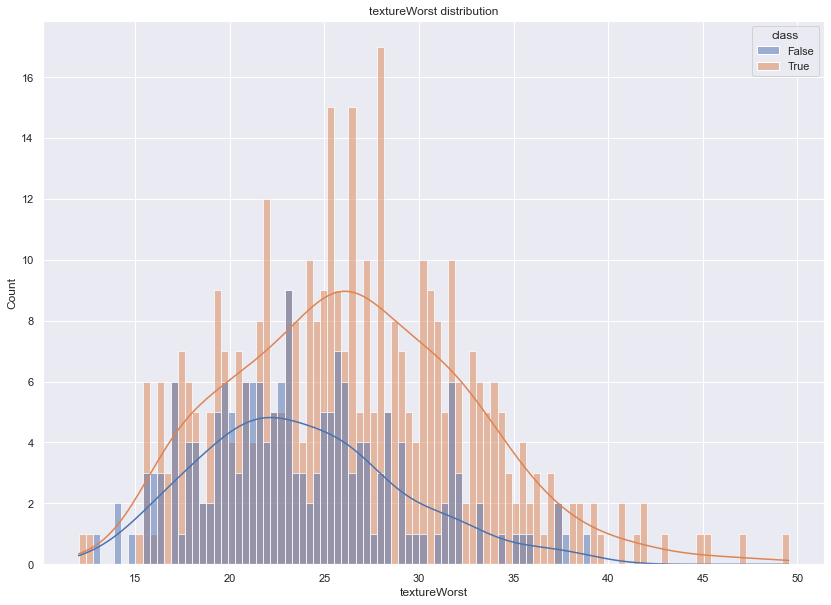

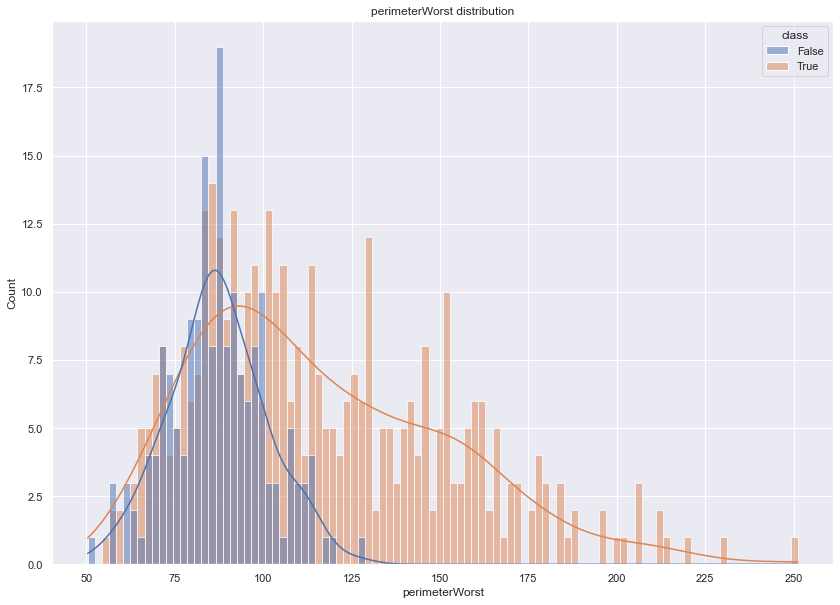

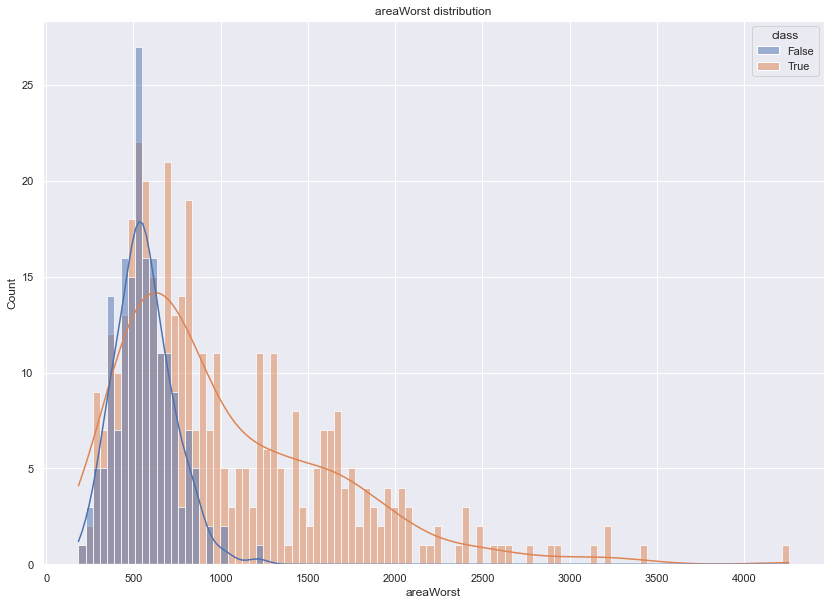

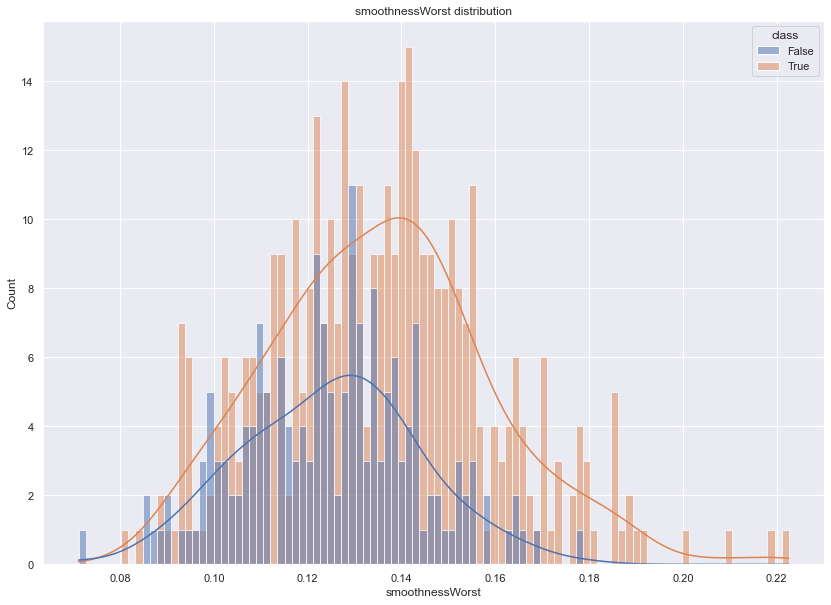

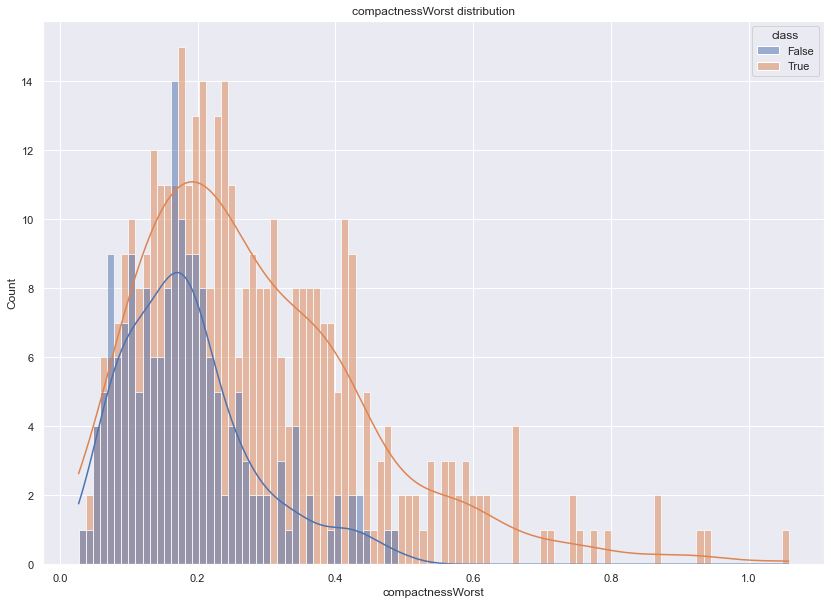

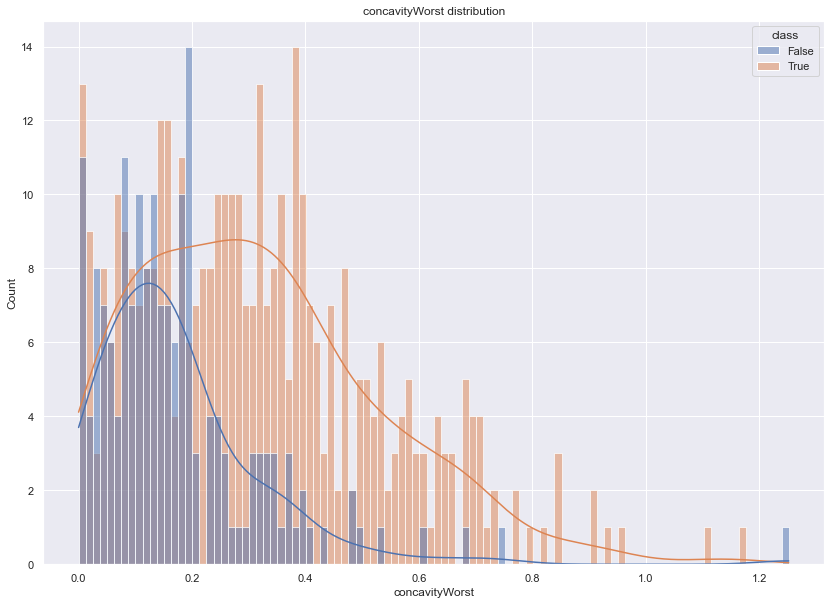

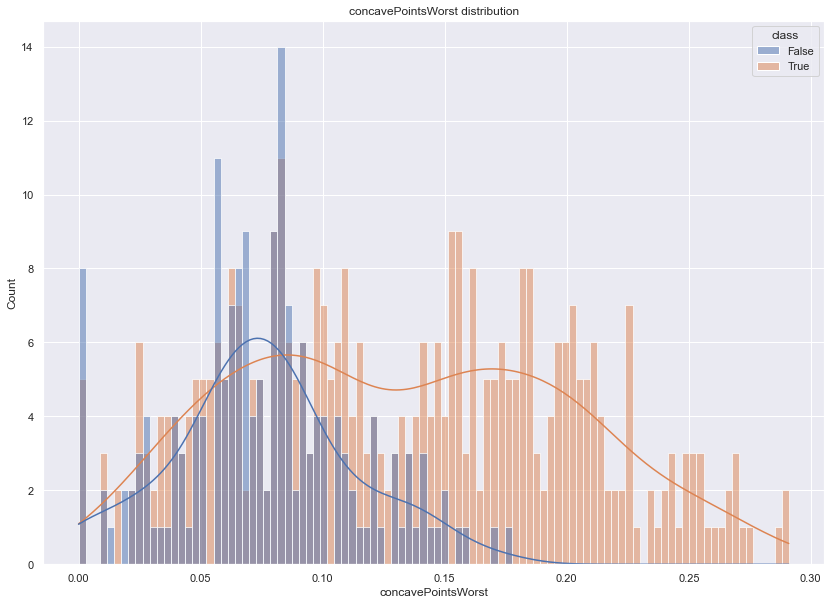

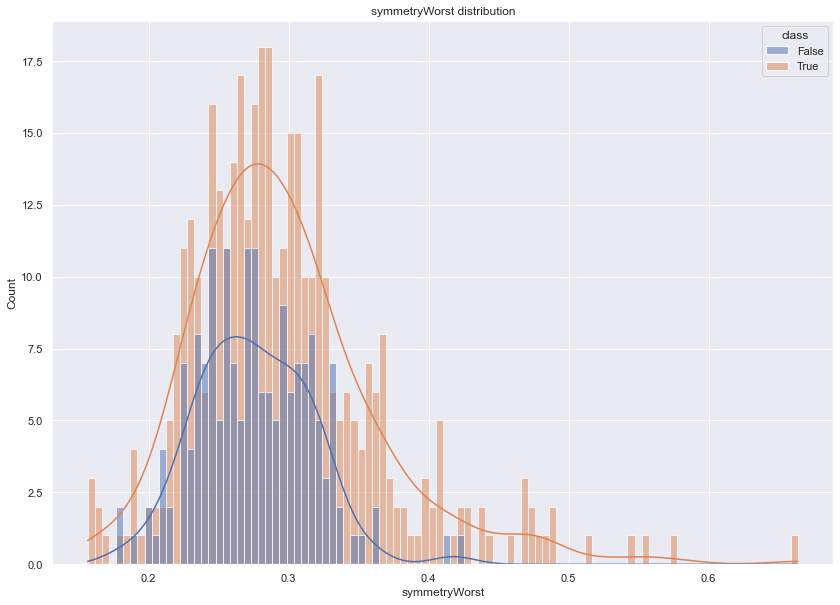

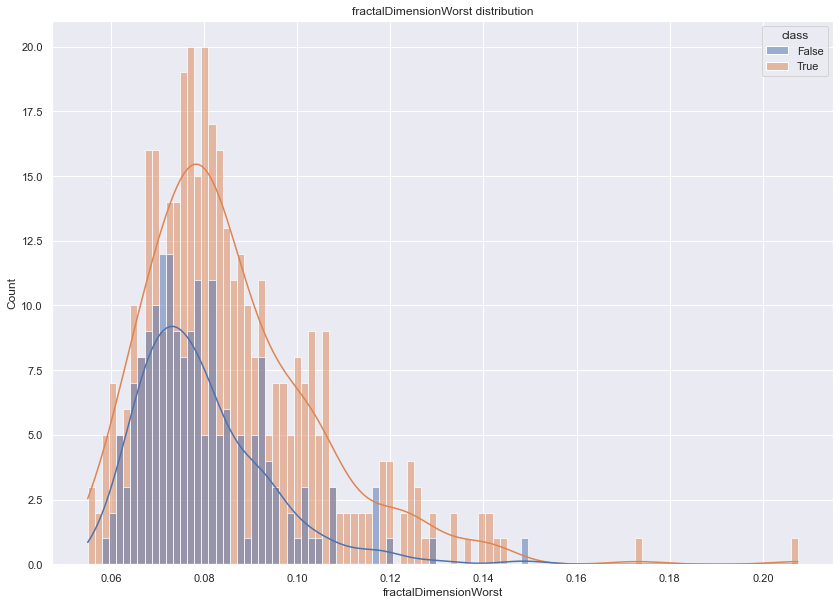

In [19]:
# plotting the distributions of the variables, with regards to the target variable
sns.set(rc={'figure.figsize':(14,10)})
plt.rcParams.update({'figure.max_open_warning': 0})

for i, col in enumerate(df.columns[2:]):
    plt.figure(i)
    plt.title(col+" distribution")
    sns.histplot(x=col, data=df, bins=100, hue="class", kde=True)

### Distribution of independent variables

The distribution of the independent variables fluctuates between positive and negative classes as expected. We can see in almost all attributes that the positive observations have higher/bigger measures than negative. That is because bigger heart generally speaking is not healthy. It is a sign that the heart is having trouble pumping blood efficiently, and that there is an issue with the patient's cardiovascular system. There are some attributes like smoothnes and texture that have measures a bit more similar between the classes.

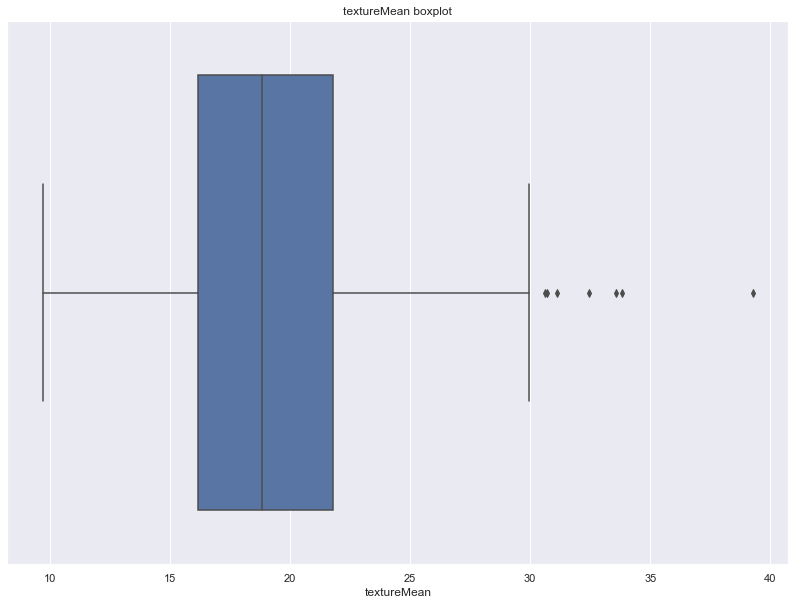

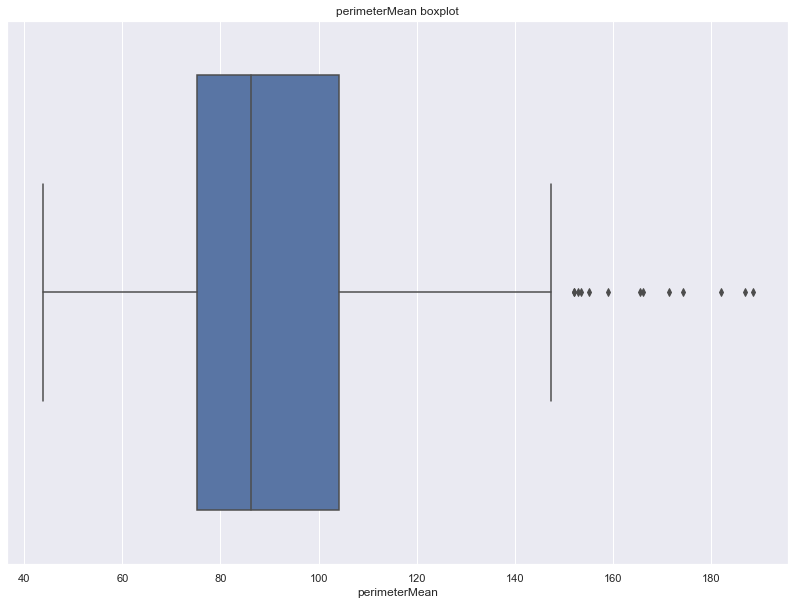

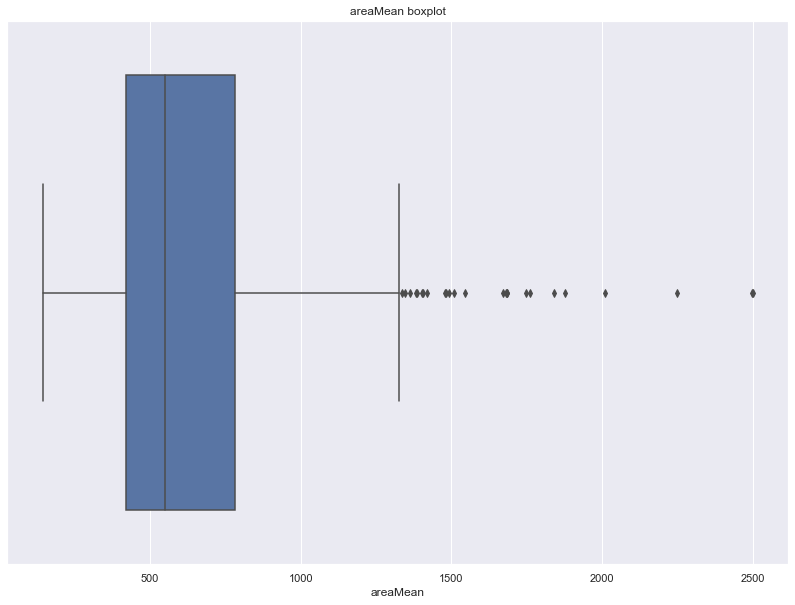

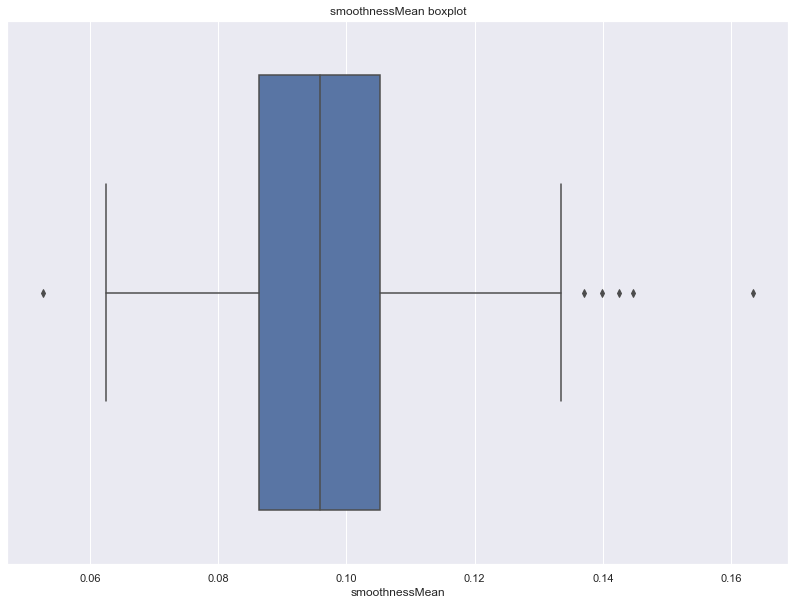

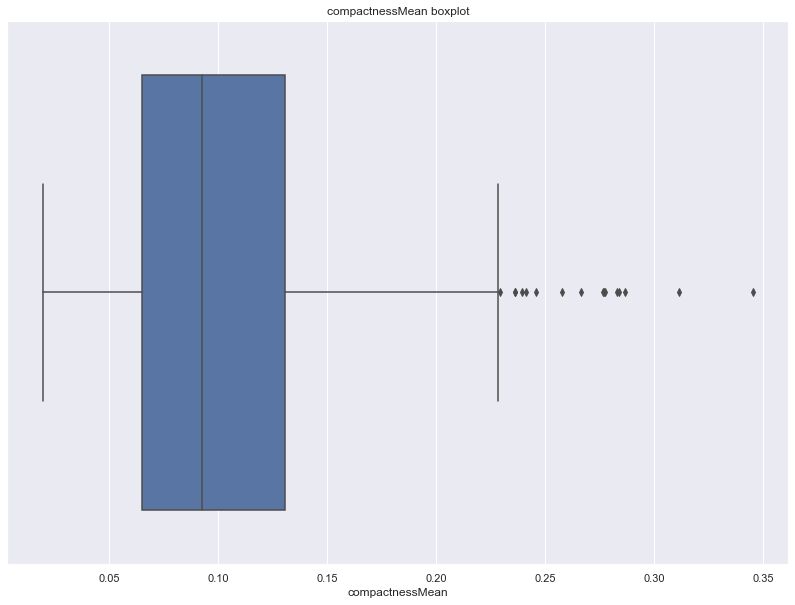

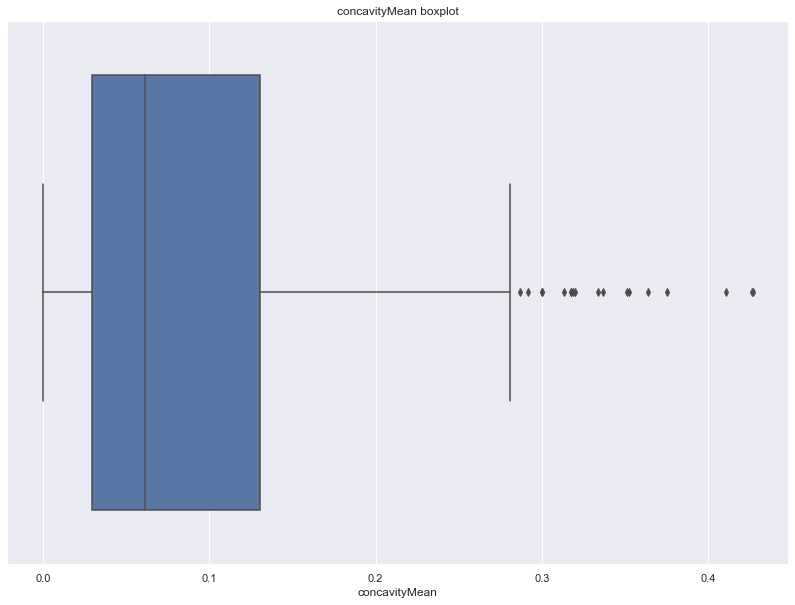

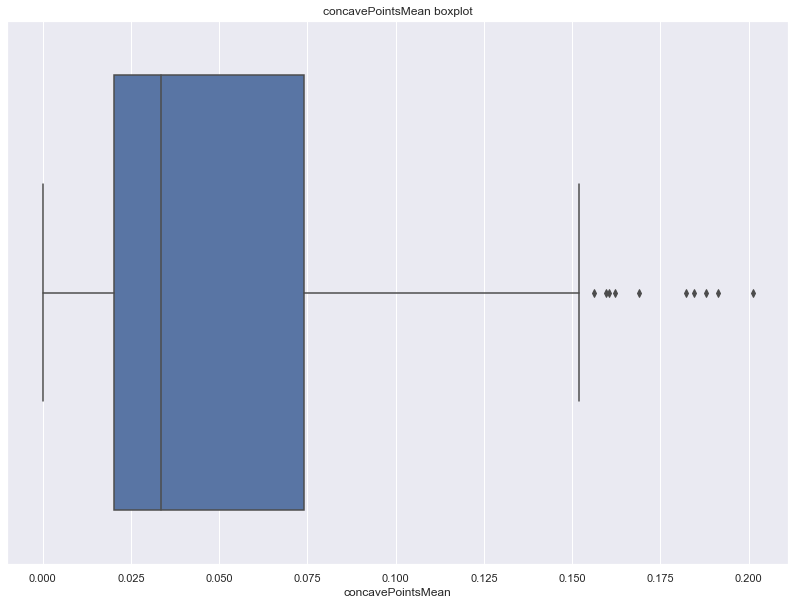

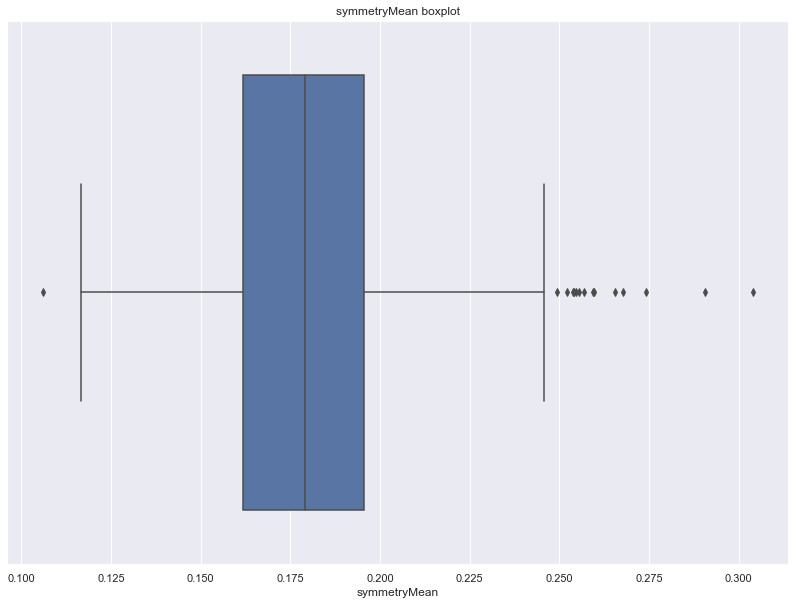

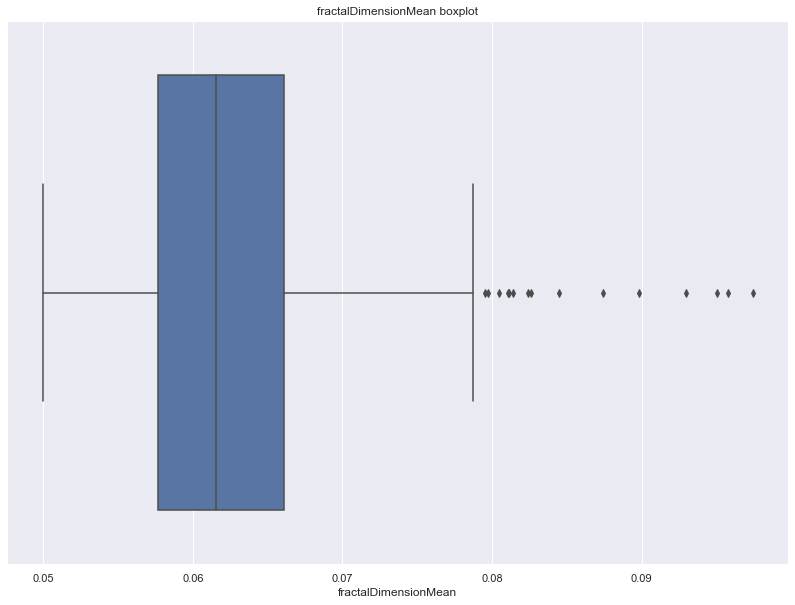

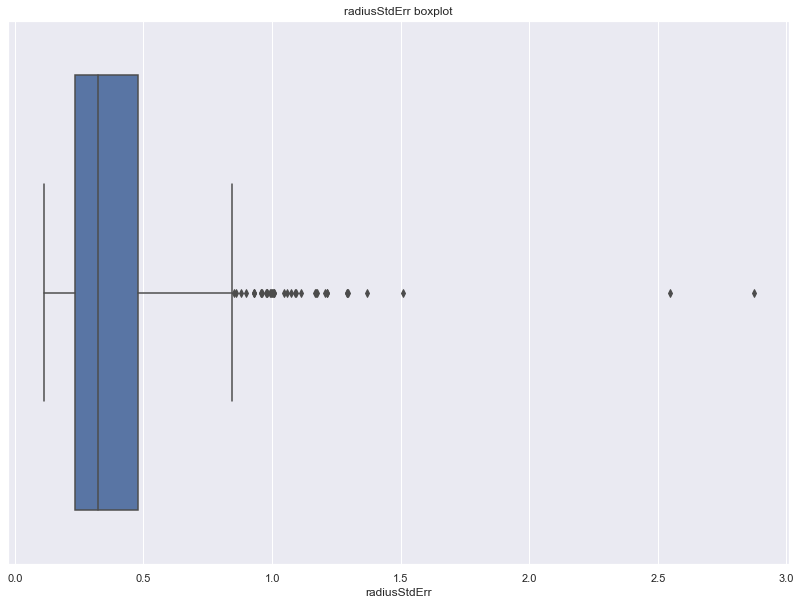

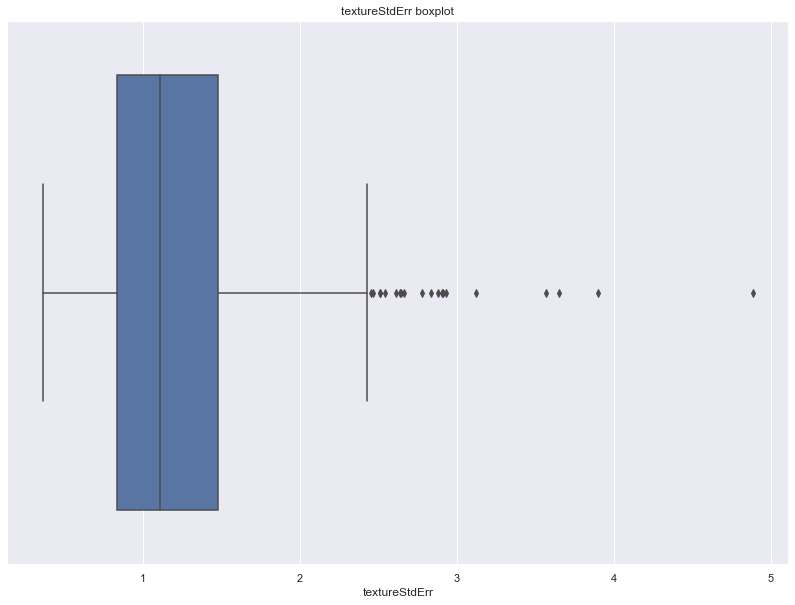

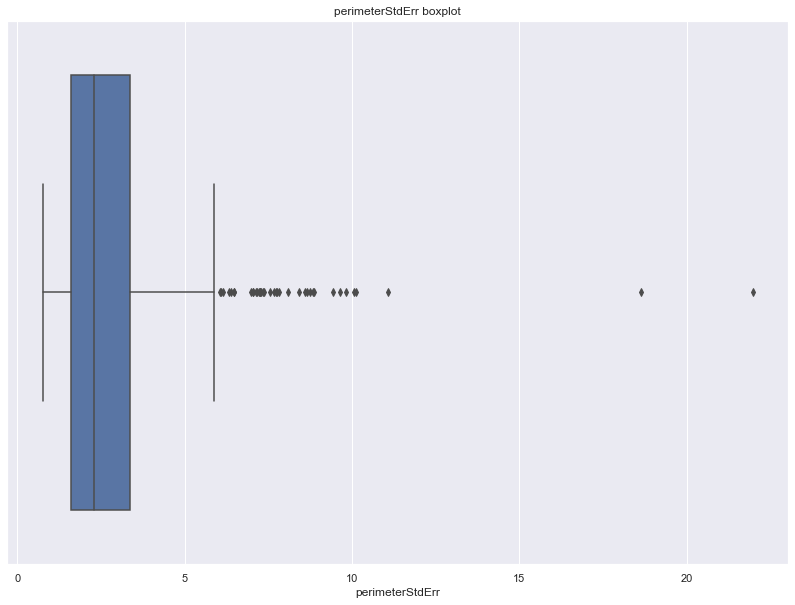

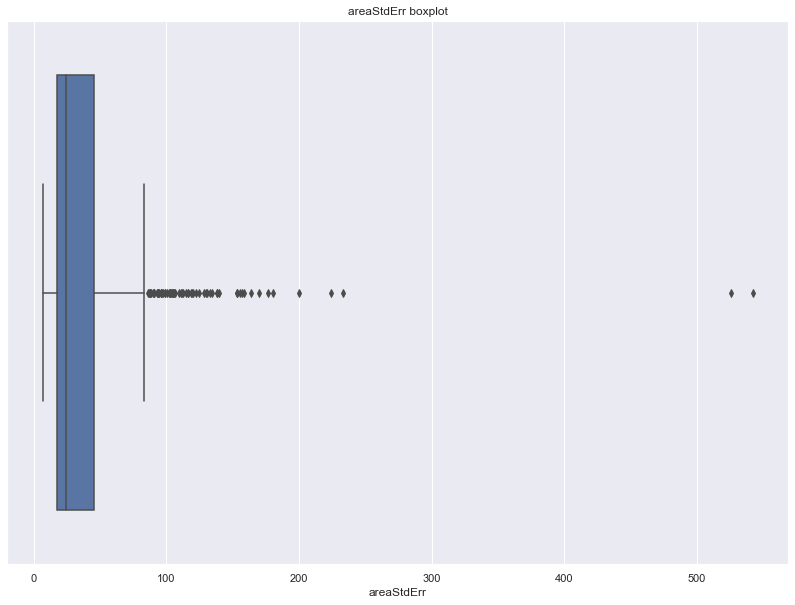

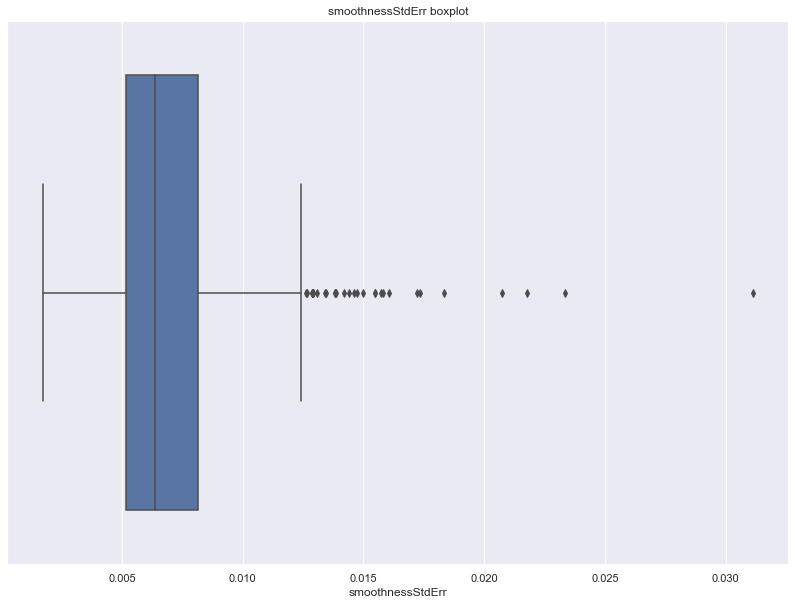

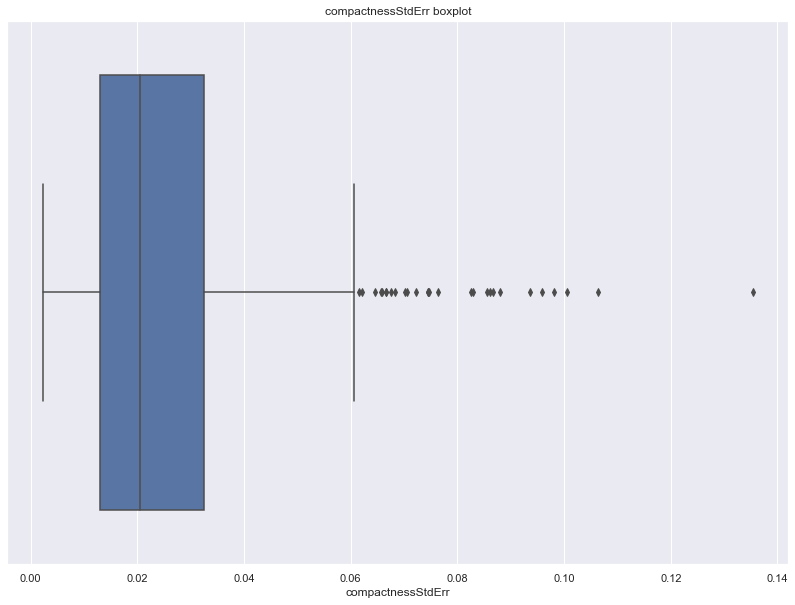

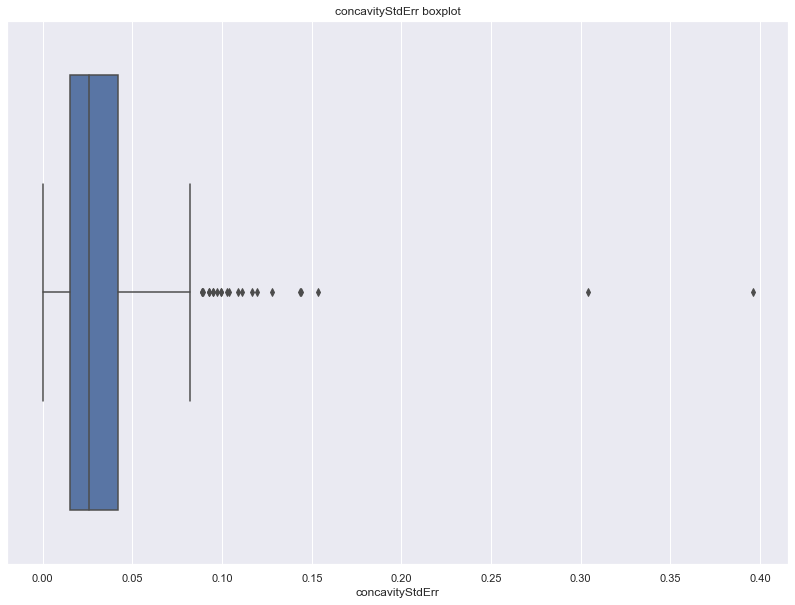

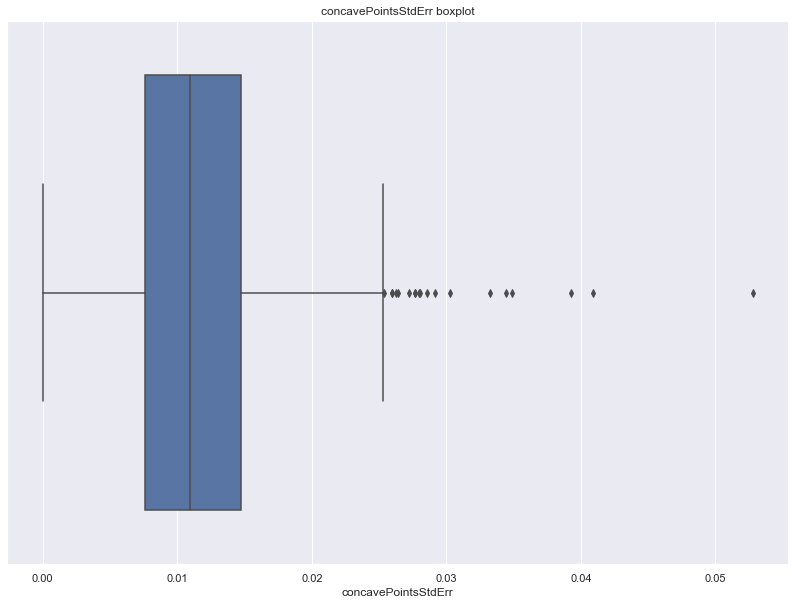

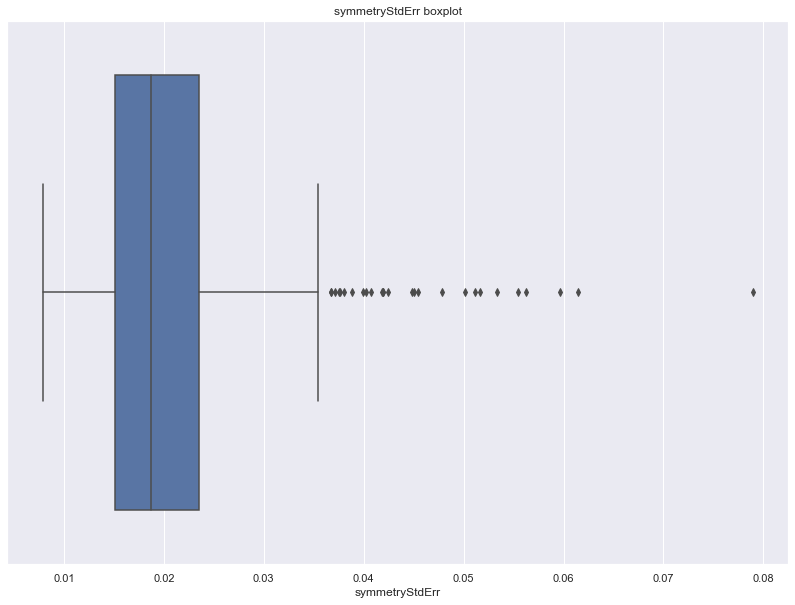

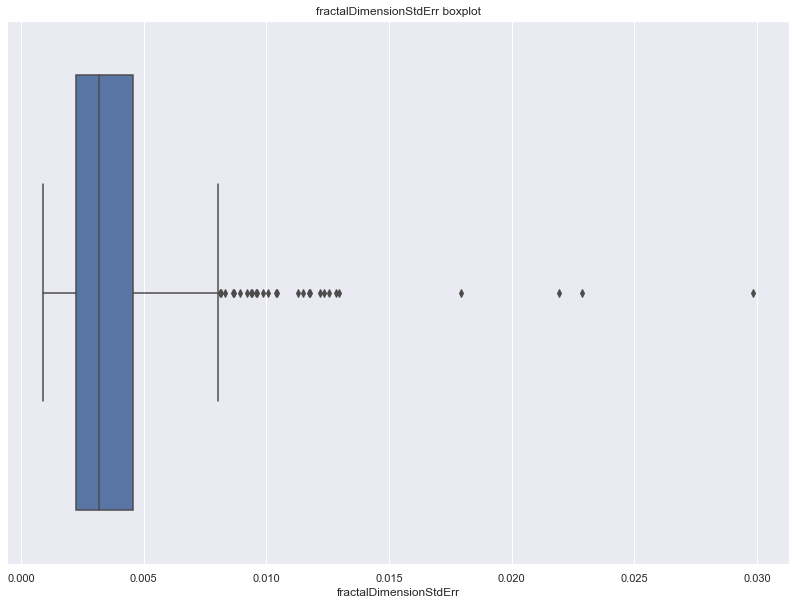

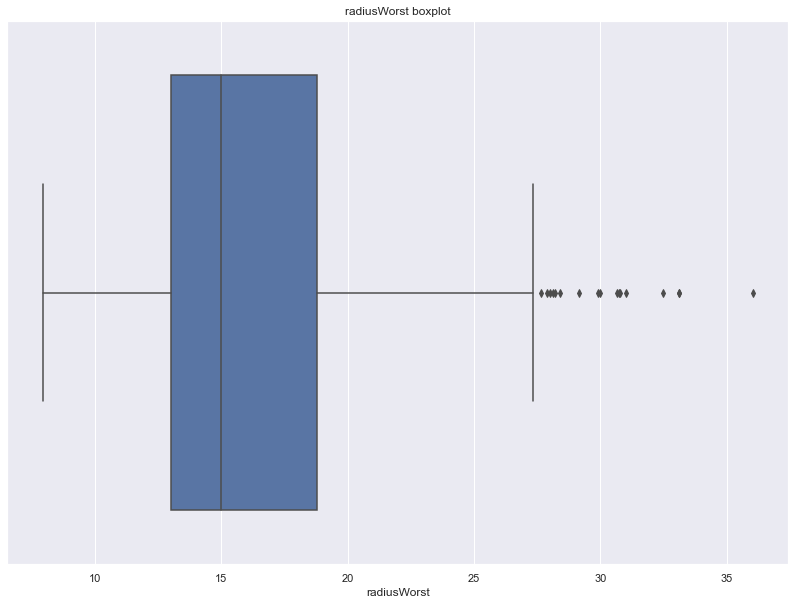

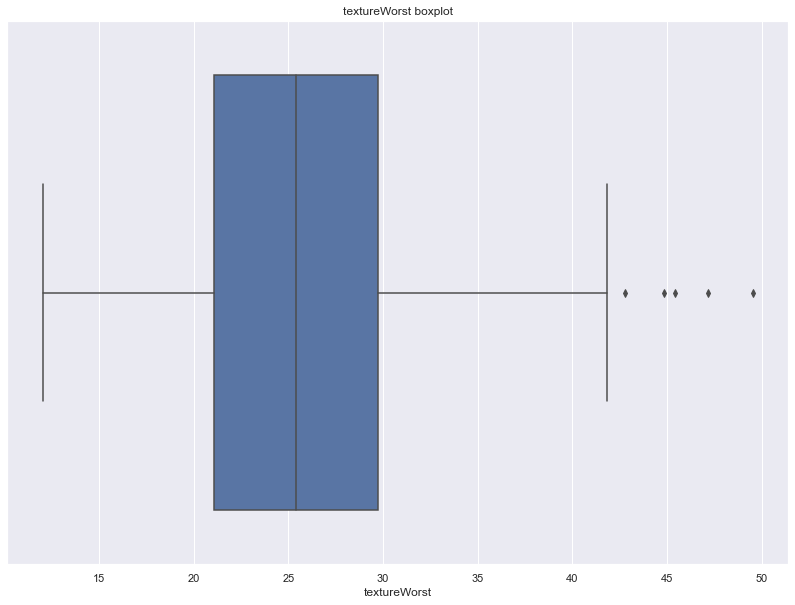

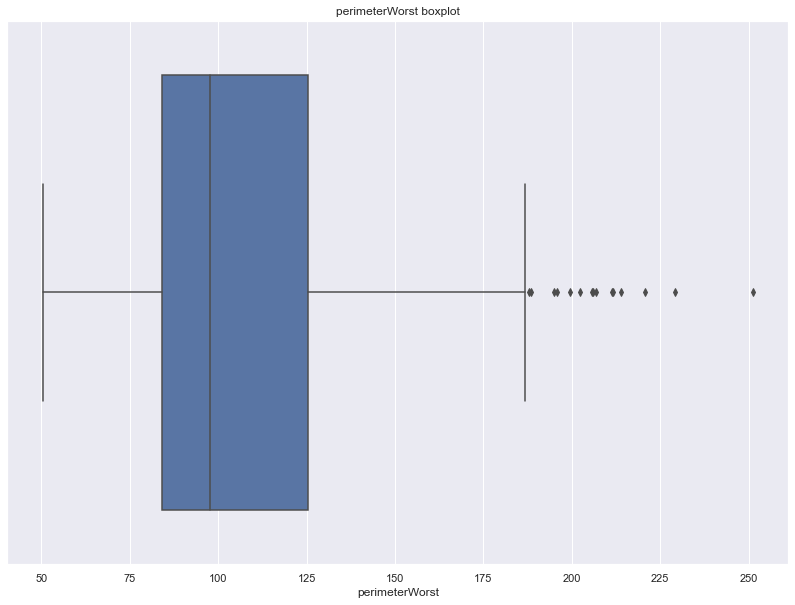

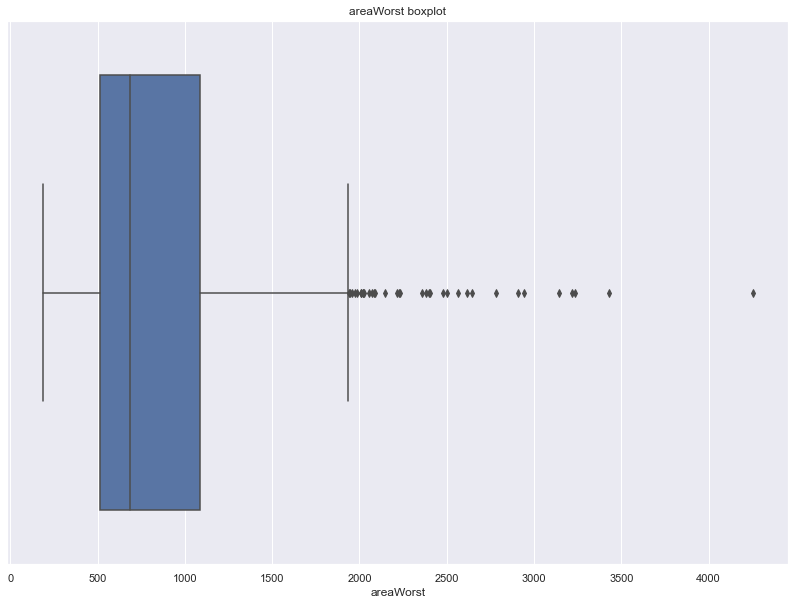

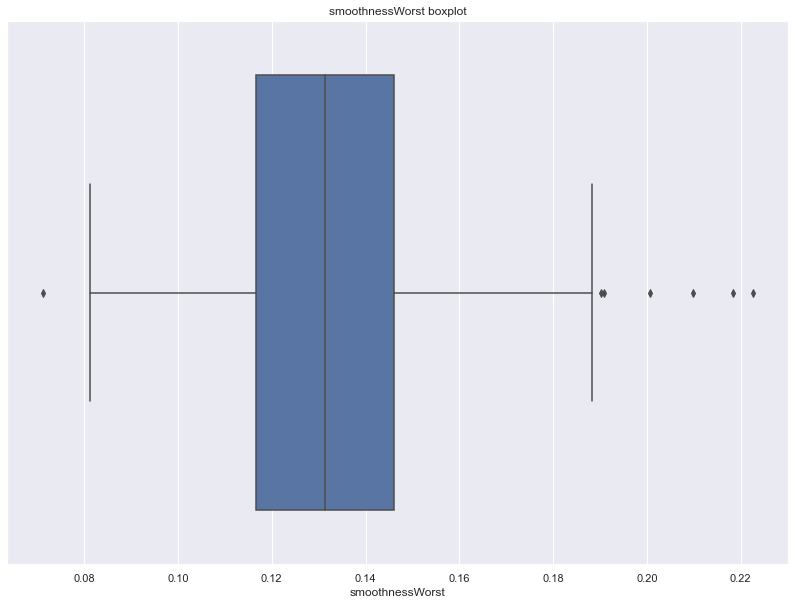

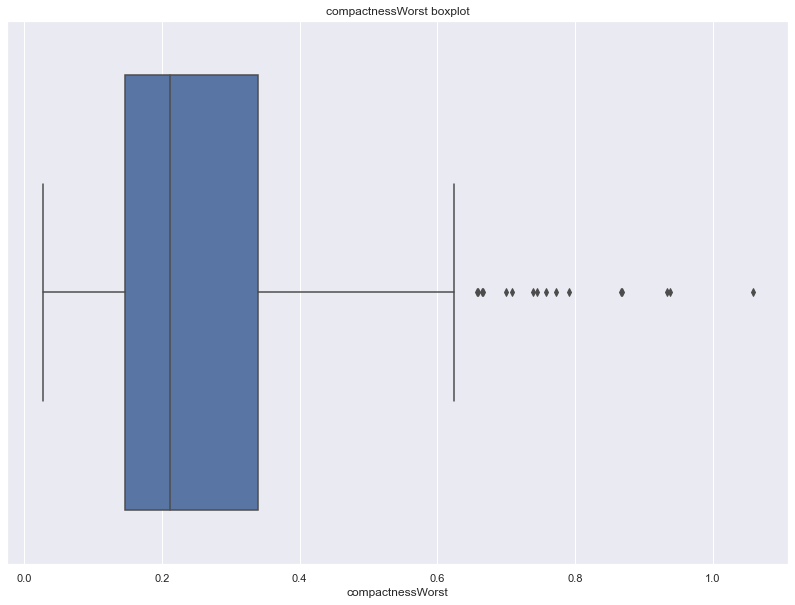

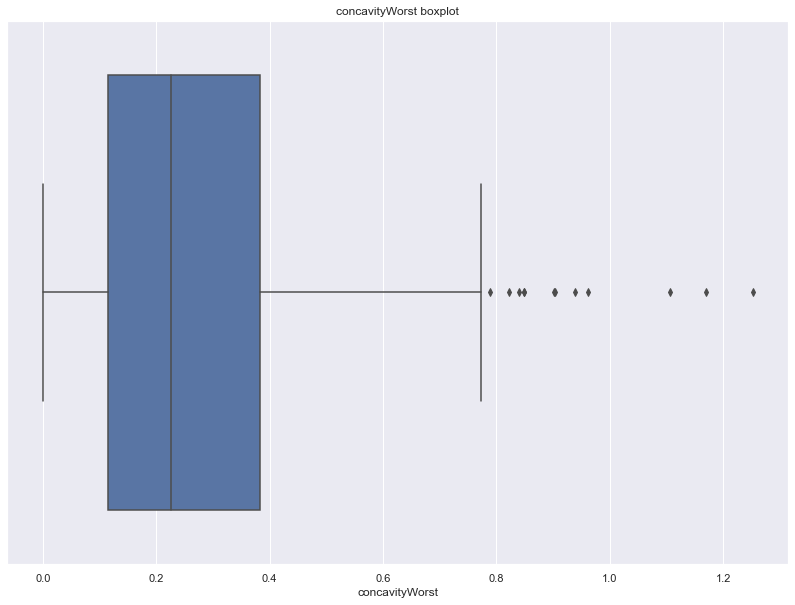

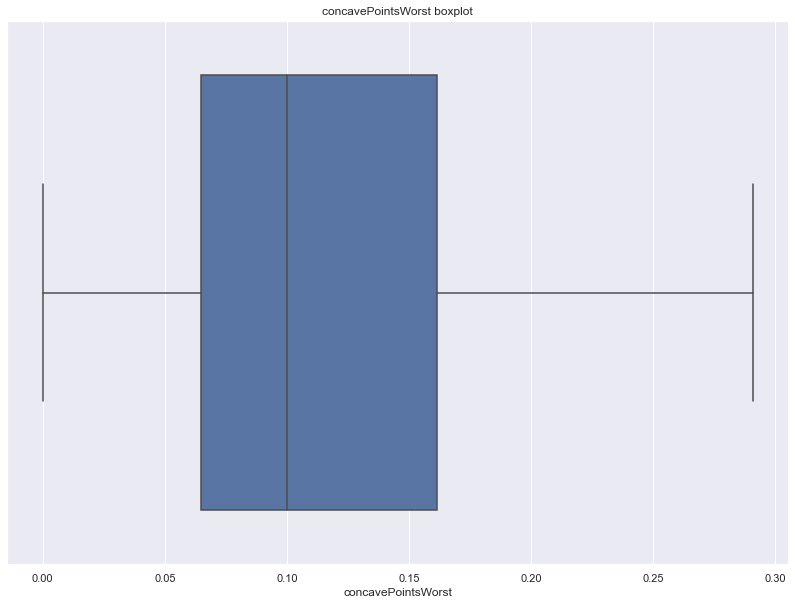

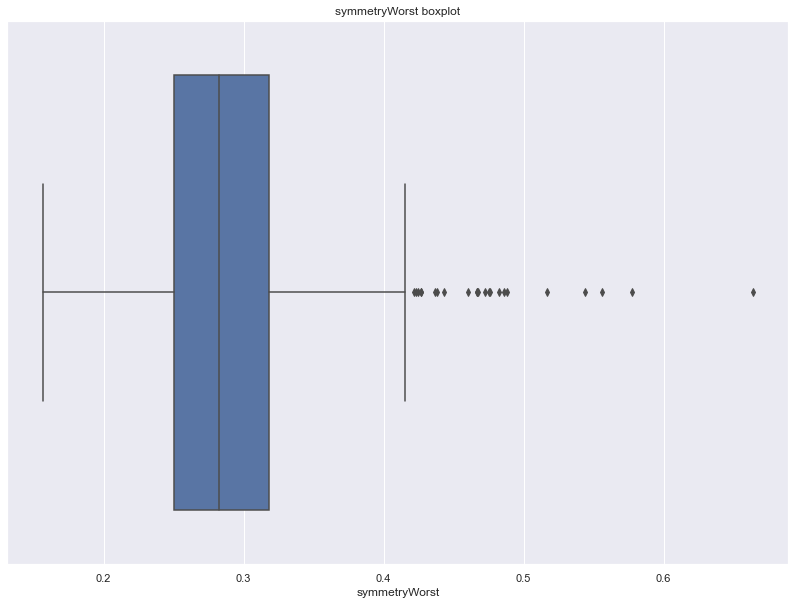

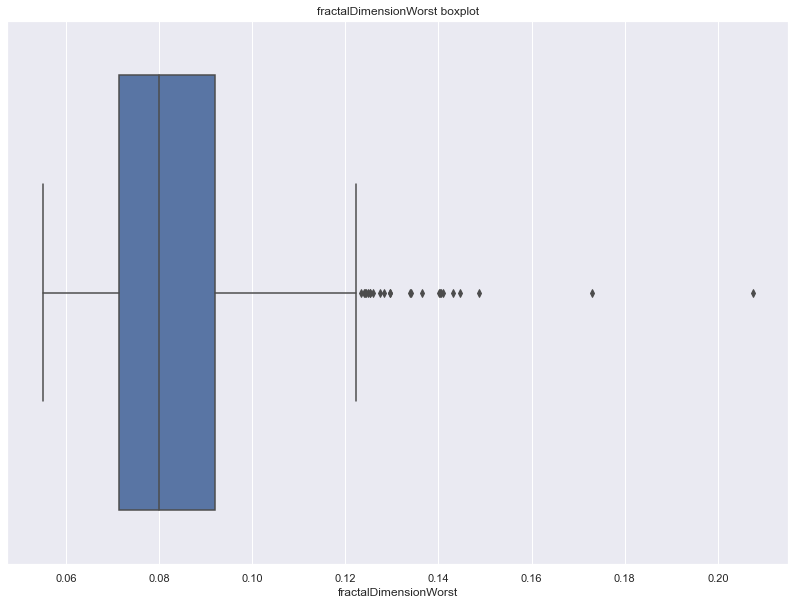

In [20]:
# boxplots of the attributes to see the distribution and outliers

for i, col in enumerate(df.columns[2:]):
    plt.figure(i)
    plt.title(col+" boxplot")
    sns.boxplot(x=df[col])

### 1.3. Outliers
In almost all of the attributes, we see from the boxplot that there are quite a few instances outside the normal range. As this is a very small data set, we are not sure how good it will be if we start removing the outliers. We will try to create a model with and without outliers, and see the difference in performance. The way we will remove the outliers will be using the RobustScaler before creating the model, that way it will remove all the instances that are outside the interquantile range.

### Experiment design

1. Exploration:
    - Target Distribution
    - Missing Values distribution
    - Outliers
2. Preprocessing:
    - Split Train/Test (70-30)
    - Clean missing values
    - Remove outliers
    - Scaling
    - Encoding
    - PCA
3. Models:
    - KNN
        - RandomizedSearchCV
        - Holdout
        - Cross-validation
    - RF
        - RandomizedSearchCV
        - Holdout
        - Cross-validation
    - MLP
        - RandomizedSearchCV
        - Holdout
        - Cross-validation
4. Metrics:
    - Accuracy
    - Precision
    - Sensitivity (for each class)
    - Specificity (for each class)
    - Recall
    - F1-Score

## 2. Preprocessing

### 2.1. Train/test split
As we've mentioned in the beginning, the data set is already pre-split because of the competition, so we will use that split which is 50/50, and not 70/30 like we've decided in our experiment design.

In [21]:
# split into train/test
df_train = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv")
df_test = pd.read_csv("data/breast-cancer-diagnostic.shuf.tes.csv")

In [22]:
df_train.set_index("ID", inplace=True)

In [23]:
df_test.set_index("ID", inplace=True)

In [24]:
X_train = df_train.drop("class", axis=1)
y_train = df_train['class']
X_test = df_test
y_test = pd.read_csv("data/breast-cancer-diagnostic.shuf.sol.ex.csv")
y_test.set_index("ID", inplace=True)
y_test = y_test.iloc[:,0]

### 2.2. Clean missing values
There are no missing values.

### 2.3. Remove outliers
We will see later on how to do this.

### 2.4. Scaling
We will try multiple scalers like StandardScaler, MinMaxScaler and RobustScaler.  
Standard Scaler scales the data according to the normal distribution with mean 0.  
MinMaxScaler scales the data in the range of 0,1 or -1,1 depending on the data.  
And RobustScaler removes the outliers by only choosing the data in the interquantile range.

### 2.5. Encoding
We do not have any variables that need encoding in this data set. We only have the target variable as true/false, but that is already in a binary format so we do not need to convert it to 1/0.

### 2.6. PCA
PCA probably won't be of help to us in this data set. But we will give it a try.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# try PCA later on

## 3. Model development

### 3.1. K-nearest neighbors

Model building:

    - standardscaler
    - minmax scaler
    - robust scaler
    - pca
    - no scaling
    
    - randomizedsearchCV
    - holdout
    - crossvalidation

In [27]:
# knn

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA

# pipe = Pipeline([('scaler', StandardScaler()), ('estimator', KNeighborsClassifier(n_neighbors=5))])

# cv = KFold(n_splits=(5))
# scores = cross_val_score(pipe, X_train, y_train, cv = cv)

In [64]:
cols = ["algorithm", "scaler", "accuracy", "precision", "recall", "f1"]
results = pd.DataFrame(columns = cols)

In [65]:
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    MLPClassifier(max_iter=500)
    ]

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    None,
    PCA()
]
for classifier in classifiers:
    for scaler in scalers:
        steps = [
        ('scaler', scaler),
        ('clf', classifier)
    ]
    
        pipeline = Pipeline(steps)
        pipeline.fit(X_train, y_train)   
        y_pred = pipeline.predict(X_test)
        
        algorithm = classifier
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        new_row = pd.DataFrame({"algorithm": str(algorithm), "scaler": str(scaler), "accuracy": accuracy, "precision":precision, "recall":recall, "f1": f1}, index=[0])
                
        results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarnin

In [66]:
results

,algorithm,scaler,accuracy,precision,recall,f1
0,MLPClassifier(max_iter=500),PCA(),0.369718,1.0,0.369718,0.539846
1,MLPClassifier(max_iter=500),None,0.327465,1.0,0.327465,0.493369
2,MLPClassifier(max_iter=500),RobustScaler(),0.348592,1.0,0.348592,0.516971
3,MLPClassifier(max_iter=500),MinMaxScaler(),0.348592,1.0,0.348592,0.516971
4,MLPClassifier(max_iter=500),StandardScaler(),0.338028,1.0,0.338028,0.505263
5,RandomForestClassifier(),PCA(),0.338028,1.0,0.338028,0.505263
6,RandomForestClassifier(),None,0.345070,1.0,0.345070,0.513089
7,RandomForestClassifier(),RobustScaler(),0.341549,1.0,0.341549,0.509186
8,RandomForestClassifier(),MinMaxScaler(),0.345070,1.0,0.345070,0.513089
9,RandomForestClassifier(),StandardScaler(),0.348592,1.0,0.348592,0.516971


left to-do:

- randomizedsearchcv
- cv
- holdout
- implement sensitivity and specificity

## 4. Results